In [1]:
# author: Bison Gianluca (870028) - Alexandru Pivanoiu (870383)
# date: 31-08-21
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [2]:
#probabilities of LCA model for each pixel
data = pd.read_csv("probs").drop(columns={"Unnamed: 0"})
data1 = data.iloc[:,[i for i in range(512) if i%2==0]]
data2 = data.iloc[:,[i for i in range(512) if i%2!=0]]

In [3]:
#real label
with open("semeion.data") as textFile:
    data = [line.split() for line in textFile]
data = np.asarray(data).astype(float)
y = data[:,-10:]
v,c = np.where(y==1)
c = c[1:]

In [4]:
#predicted label
predictions = np.squeeze(pd.read_csv("predclass").drop(columns={"Unnamed: 0"}).to_numpy())

In [5]:
#function to better representent the confusion matrix
def rematchLabels(c,labels):
    mat = confusion_matrix(c, labels)
    clusters = mat.shape[0]
    check_row = np.zeros(clusters)
    check_col = np.zeros(clusters)
    matching = np.zeros(clusters)
    for i in range(clusters*clusters):
        best = mat.argmax()
        row = int(best/clusters)
        col = best%clusters
        if(check_col[col]==0 and check_row[row]==0):
            check_row[row] = 1
            check_col[col] = 1
            matching[col] = int(row)
        mat[row,col] = 0

    match = lambda x: matching[x]

    return match(labels)

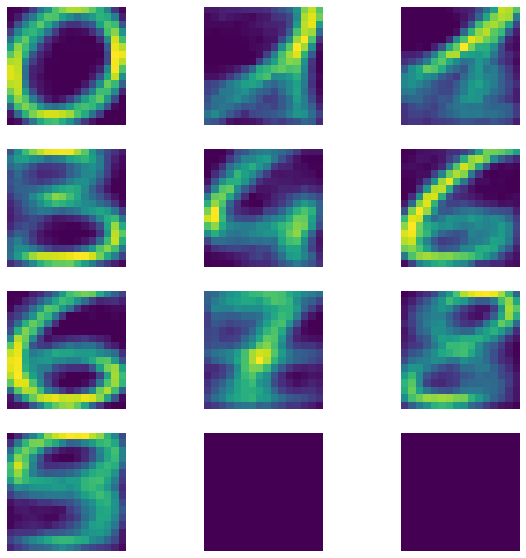

In [6]:
_, axarr = plt.subplots(4,3,figsize=(10,10))
label = 0
vetLabel = [9,5,8,2,4,3,0,1,6,7]
for i in range(4):
    for j in range(3):
        if label<10:
            axarr[i,j].imshow(np.array(data2.iloc[vetLabel[label],:]).reshape(16,16))       
            axarr[i,j].axis('off') 
            label+=1;
        else:
            axarr[i,j].imshow(np.array([0 for i in range(256)]).reshape(16,16))       
            axarr[i,j].axis('off') #hiding the axis values for all the 25 images

<AxesSubplot:>

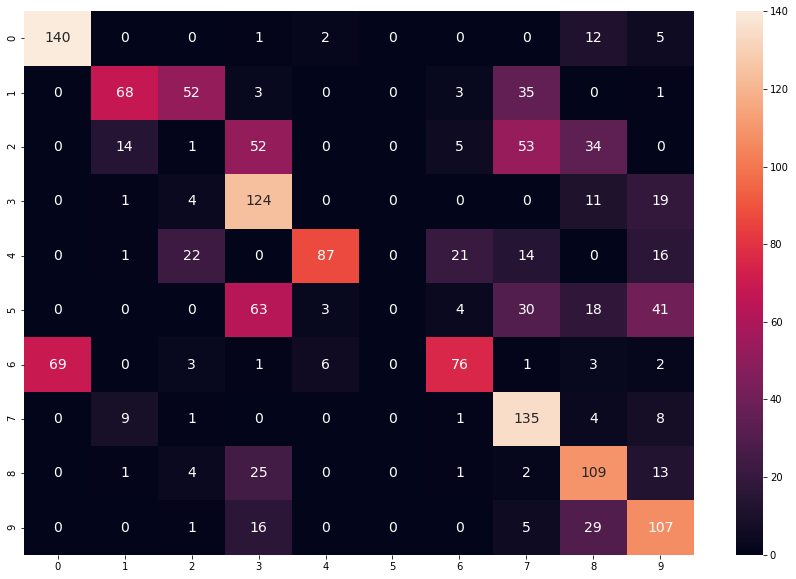

In [7]:
plt.figure(figsize=(15,10))
predictions = rematchLabels(c,predictions)
sns.heatmap(confusion_matrix(c, predictions), annot=True,annot_kws={"size": 14}, fmt=".0f")